## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


## Import dataset

In [3]:
df = pd.read_csv("../milk_data.csv")
df.tail(10)

,titrable_acidity,temperature,pH,conductivity,status,created_at
8400,0.136,21.6,5.27,0.35,UNKNOWN,2025-05-23 15:33:45
8401,0.142,21.5,5.20,0.35,FRESH,2025-05-23 15:33:48
8402,0.143,21.4,5.19,0.35,FRESH,2025-05-23 15:33:51
8403,0.145,21.3,5.16,0.35,FRESH,2025-05-23 15:33:54
8404,0.146,21.2,5.15,0.35,FRESH,2025-05-23 15:33:57
8405,0.146,21.1,5.15,0.35,FRESH,2025-05-23 15:34:00
8406,0.148,21.0,5.12,0.35,FRESH,2025-05-23 15:34:03
8407,0.148,20.9,5.12,0.35,FRESH,2025-05-23 15:34:06
8408,0.149,20.8,5.10,0.35,FRESH,2025-05-23 15:34:09
8409,0.153,20.7,5.06,0.35,FRESH,2025-05-23 15:34:12


## Data Preprocessing

In [4]:
# Check for missing values
print(df.isnull().sum())

titrable_acidity    0
temperature         0
pH                  0
conductivity        0
status              1
created_at          0
dtype: int64


In [5]:
# drop rows with missing values
df.dropna(inplace=True)

In [6]:
# Remove unwanted columns
df = df.drop(columns=["created_at"], axis=1)


In [7]:
df.tail()

,titrable_acidity,temperature,pH,conductivity,status
8405,0.146,21.1,5.15,0.35,FRESH
8406,0.148,21.0,5.12,0.35,FRESH
8407,0.148,20.9,5.12,0.35,FRESH
8408,0.149,20.8,5.10,0.35,FRESH
8409,0.153,20.7,5.06,0.35,FRESH


In [8]:
df['status'].value_counts()

status
Bad           3809
UNKNOWN       1846
SPOILED        847
BAD            383
Unknown        369
Acceptable     348
Fresh          267
Spoiled        218
ACCEPTABLE     197
FRESH          125
Name: count, dtype: int64

In [9]:
# rename the classes
df.replace({'status': {'BAD': 'Bad', 'UNKNOWN': 'Unknown', 'ACCEPTABLE':'Acceptable', 'SPOILED':'Spoiled', 'FRESH':'Fresh'}}, inplace=True)
df['status'].value_counts()

status
Bad           4192
Unknown       2215
Spoiled       1065
Acceptable     545
Fresh          392
Name: count, dtype: int64

In [10]:
df.shape

(8409, 5)

In [11]:
# check for duplicates
print(df.duplicated().sum())

5949


In [12]:
# drop duplicated values
df = df.drop_duplicates()
df.shape

(2460, 5)

In [13]:
# check statistics of our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
titrable_acidity,2460.0,0.179614,0.190216,0.0,0.1270,0.132,0.198,1.00
temperature,2460.0,25.692154,6.015162,0.0,24.0000,24.300,25.200,49.90
pH,2460.0,6.333045,2.527594,0.0,4.5375,6.500,6.670,13.03
conductivity,2460.0,0.903472,0.808322,0.0,0.5500,1.000,1.030,16.08


In [14]:
# check outliers
def check_outliers(data):
    for col in data.columns[:-1]:
        if data[col].dtype != 'object':
            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
            print(f"Outliers in {col}: {len(outliers)}")

check_outliers(df)

Outliers in titrable_acidity: 712
Outliers in temperature: 503
Outliers in pH: 345
Outliers in conductivity: 140


In [15]:
def remove_outliers(data):
    
    for col in data.columns[:-1]:
        if data[col].dtype != 'object':
            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            df = np.where(data[col] < lower_bound, lower_bound, np.where(data[col]> upper_bound, upper_bound, data[col]))
            data[col] = df
            
    return data
df = remove_outliers(df)
df.head()


,titrable_acidity,temperature,pH,conductivity,status
0,0.130,24.0,6.61,0.99,Bad
1,0.134,24.2,6.57,1.03,Bad
2,0.137,24.0,6.58,1.00,Bad
3,0.134,24.0,6.59,1.00,Bad
4,0.130,24.0,6.56,1.04,Bad


In [16]:
# lets check outliers again
check_outliers(df)

Outliers in titrable_acidity: 0
Outliers in temperature: 0
Outliers in pH: 0
Outliers in conductivity: 0


## Data Exploratory Analysis (EDA)

<Figure size 1500x1000 with 0 Axes>

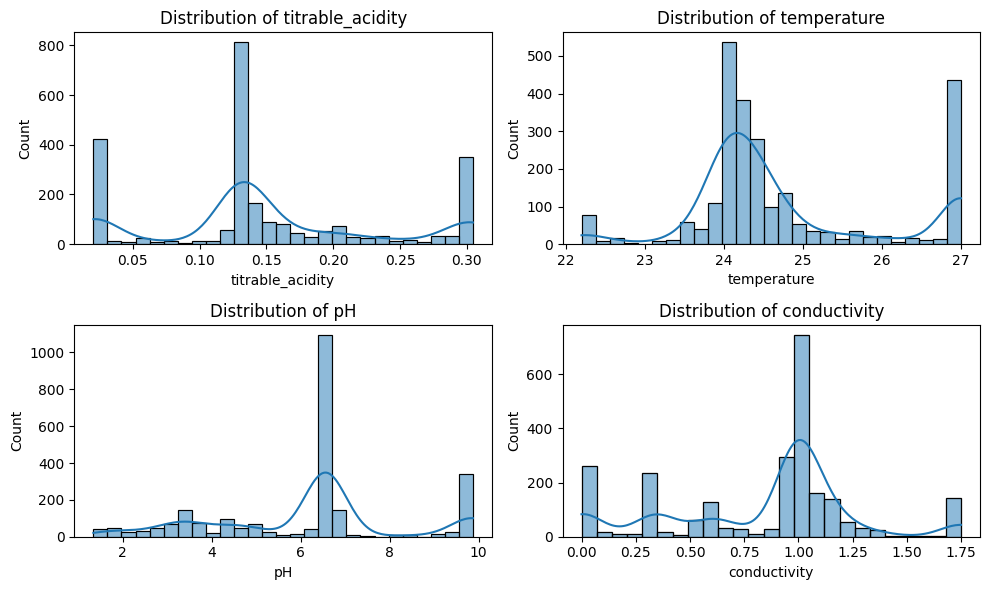

In [17]:
# Plot the distribution of features
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

for i, col in enumerate(df.columns[:-1]):
    x = i//2
    y = i%2
    sns.histplot(df[col], ax=ax[x,y], kde=True)
    ax[x][y].set_title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

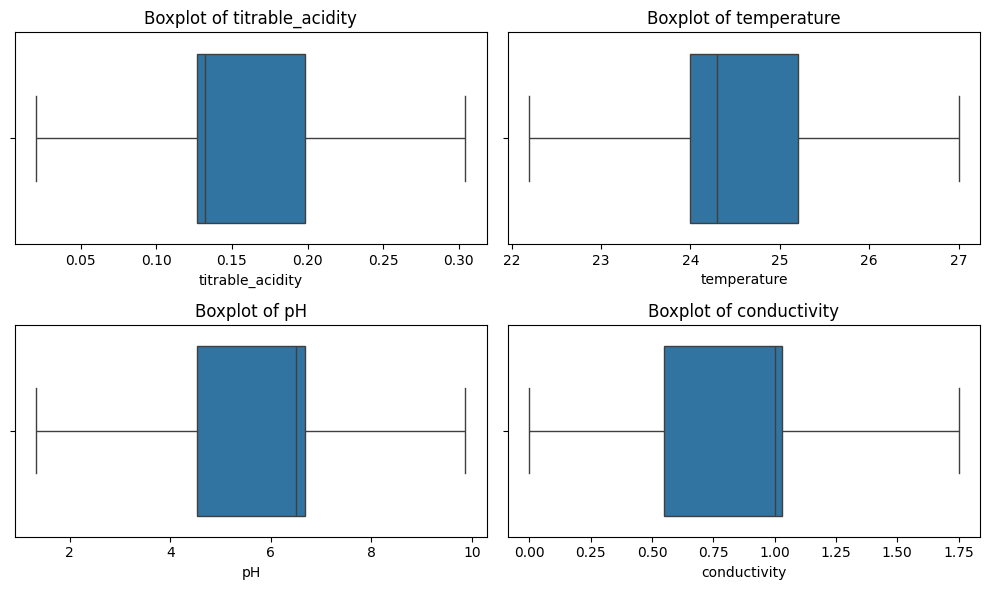

In [18]:
# check for outliers using boxplot
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
for i, col in enumerate(df.columns[:-1]):
    x = i//2
    y = i%2
    sns.boxplot(x=df[col], ax=ax[x,y])
    ax[x][y].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

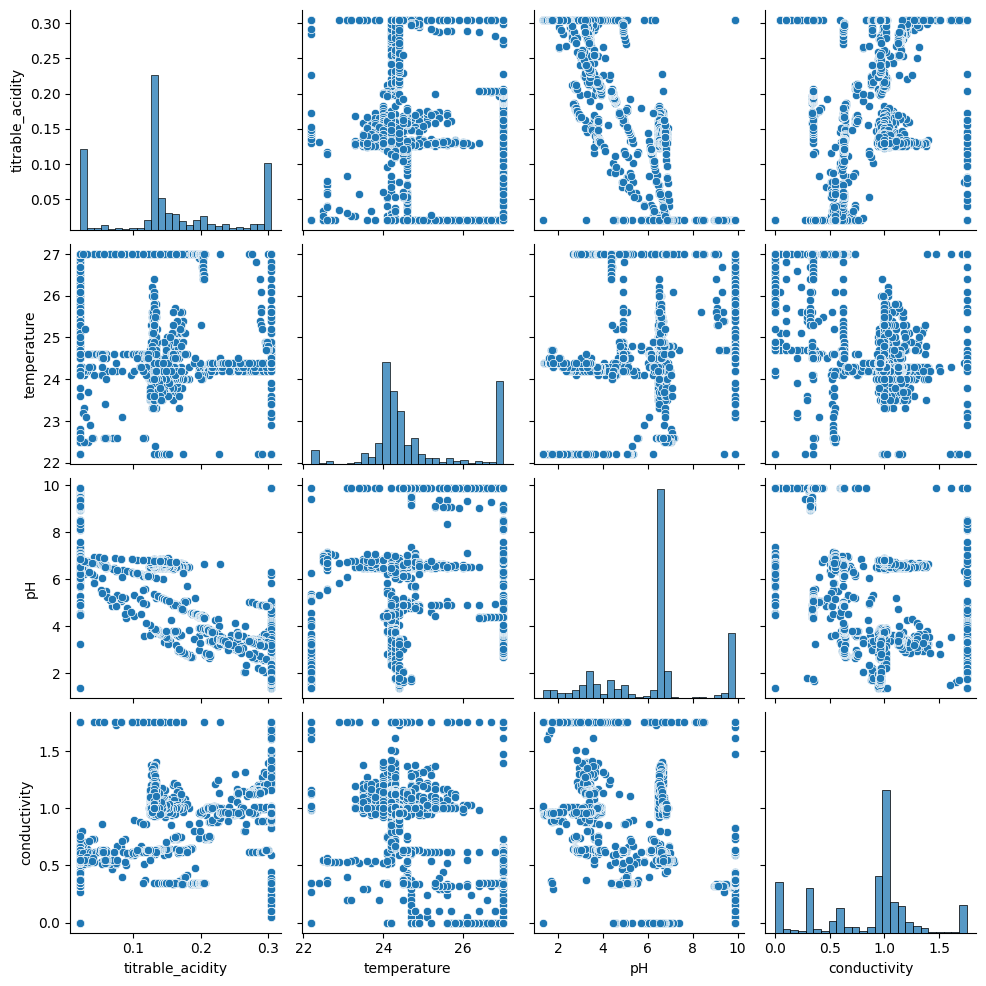

In [19]:
# Check distribution using pairplot
plt.figure(figsize=(8,6))
sns.pairplot(df)
plt.show()

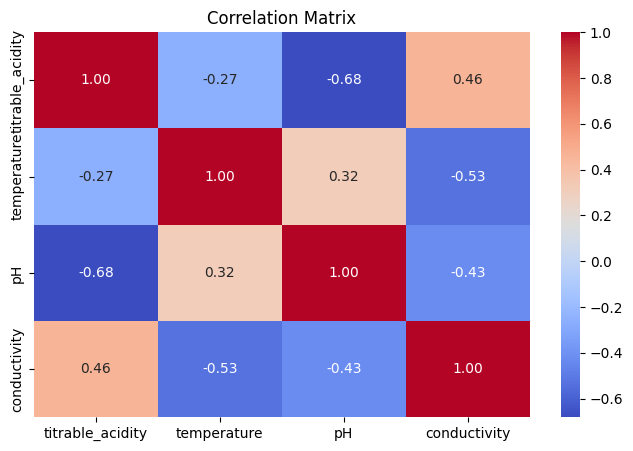

In [20]:
# Check the correlation between features
df_correl = df.drop(columns=['status'], axis=1)
plt.figure(figsize=(8, 5))
sns.heatmap(df_correl.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Split the dataset

In [21]:
X = df.drop(columns=['status'], axis=1)
y = df['status']

In [22]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape out splited data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1968, 4), (492, 4), (1968,), (492,))

## Train Model

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
train_accuracy = tree.score(x_train,y_train)
print(f"Training accuracy: {train_accuracy*100:.2f}%")

Training accuracy: 100.00%


In [25]:
# Evaluate the performance of decision tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

y_pred = tree.predict(x_test)
# Evaluate the performance of decision tree
accuracy = accuracy_score(y_test, y_pred)
print(f"The prediction accuracy: {accuracy*100:.2f}%")

The prediction accuracy: 99.39%


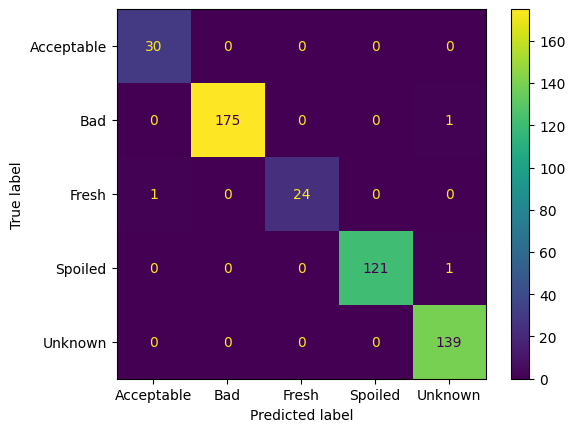

In [26]:
ConfusionMatrixDisplay.from_predictions(y_pred, y_test);


Train other models

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

models = {
    "log_reg": LogisticRegression(),
    "rfc": RandomForestClassifier(),
    "tree":DecisionTreeClassifier()
}

def train_models(models, x_train, y_train, x_test, y_test):
    data = []
    for name, model in models.items():
        classifier = model
        classifier.fit(x_train, y_train)
        train_accuracy = classifier.score(x_train, y_train)
        y_pred = classifier.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)

        data.append({
            "model": name,
            "train_accuracy": round(train_accuracy,2),
            "test_accuracy": round(accuracy,2)
        })

    return pd.DataFrame(data).set_index("model")


In [28]:
output = train_models(models,x_train,y_train, x_test, y_test)
output

,train_accuracy,test_accuracy
model,,
log_reg,0.77,0.76
rfc,1.00,0.99
tree,1.00,0.99


#### Comment:
From above three models, we can choose    `DecisionTreeClassifier as the best model` 

## Save Model

In [29]:
# Save decision tree model
import pickle

pickle.dump(tree, open("decision_tree_model.pkl","wb"))

In [30]:
# Load saved model
tree_model = pickle.load(open("decision_tree_model.pkl", "rb"))
tree_model

DecisionTreeClassifier()